In [1]:
#Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Reading the dataset from the local directory
datapath = '/Users/neerajtadur/Downloads/ISB_COURSE_Python/Session07-RCode'
input = pd.read_csv(datapath+'/UniversitiesWithClusterMembership.csv')
input.columns = input.columns.str.replace(' ', '_')
input.shape
input.head()

,Unnamed:_0,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_ID
0,1,Brown,RI,1310,89,22,13,22704,94,1
1,2,CalTech,CA,1415,100,25,6,63575,81,2
2,3,CMU,PA,1260,62,59,9,25026,72,3
3,4,Columbia,NY,1310,76,24,12,31510,88,1
4,5,Cornell,NY,1280,83,33,13,21864,90,1


In [3]:
## exclude the columns with university and state names
mydata = input.iloc[::,3:9]

In [4]:
## normalize the columns
from sklearn import preprocessing
normalized_data = preprocessing.StandardScaler().fit_transform(mydata)

In [5]:
normalized_data = pd.DataFrame(normalized_data,columns=['SAT','Top10','Accept','SFRatio','Expenses','GradRate'])

In [6]:
normalized_data.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


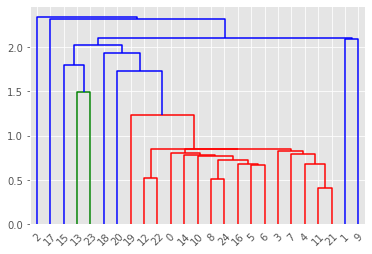

In [7]:
## Hierarchical Clustering
## Aproach 1: Euclidean distance, Single linkage
from scipy.cluster import hierarchy
Z = hierarchy.linkage(normalized_data, 'single', 'euclidean')
plt.figure()
dn = hierarchy.dendrogram(Z)

In [8]:
from scipy import cluster
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=10)

In [9]:
membership = pd.DataFrame(cutree)

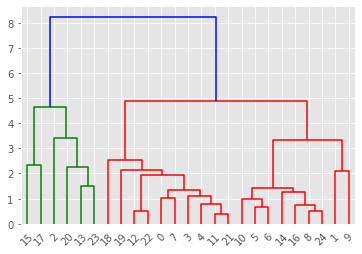

In [10]:
## Aproach 2: Euclidean distance, Complete linkage
from scipy.cluster import hierarchy
Z_2 = hierarchy.linkage(normalized_data, 'complete', 'euclidean')
plt.figure()
dn = hierarchy.dendrogram(Z_2)

In [11]:
groups = cluster.hierarchy.cut_tree(Z_2, n_clusters=3)

In [12]:
membership = pd.DataFrame(groups)

In [13]:
input["Cluster_ID"] = membership

In [14]:
cluster1 = input.loc[input["Cluster_ID"]==0,]
cluster1 ## what sort of universities are these?
cluster2 = input.loc[input["Cluster_ID"]==1,]
cluster2 ## what sort of universities are these?
cluster3 = input.loc[input["Cluster_ID"]==2,]
cluster3 ## what sort of universities are these?

,Unnamed:_0,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_ID
2,3,CMU,PA,1260,62,59,9,25026,72,2
13,14,PennState,PA,1081,38,54,18,10185,80,2
15,16,Purdue,IN,1005,28,90,19,9066,69,2
17,18,TexasA&M,TX,1075,49,67,25,8704,67,2
20,21,UMichigan,MI,1180,65,68,16,15470,85,2
23,24,UWisconsin,WI,1085,40,69,15,11857,71,2


In [15]:
input.head()

,Unnamed:_0,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_ID
0,1,Brown,RI,1310,89,22,13,22704,94,0
1,2,CalTech,CA,1415,100,25,6,63575,81,1
2,3,CMU,PA,1260,62,59,9,25026,72,2
3,4,Columbia,NY,1310,76,24,12,31510,88,0
4,5,Cornell,NY,1280,83,33,13,21864,90,0


#Notes - RClust functionality not available in python